In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def func_exercise1(x):
    return x**2*np.sin(x)

In [15]:
def derivative_exercise1(x):
    return 2*x*np.sin(x) + x**2*np.cos(x)

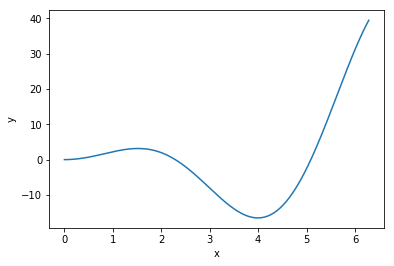

In [16]:
fig, ax = plt.subplots()
x = np.linspace(0,2*np.pi,200)
ax.plot(x, derivative_exercise1(x))
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [28]:
def central_difference(func, x, h):
    """
    calculate numerical derivative with central difference method
    
    """
    return (func(x+h) - func(x-h)) / (2*h)
    

In [29]:
num_deriv = []
for h in [0.1, 0.01, 0.001]:
    num_deriv.append(central_difference(func_exercise1, x, h))
    
    

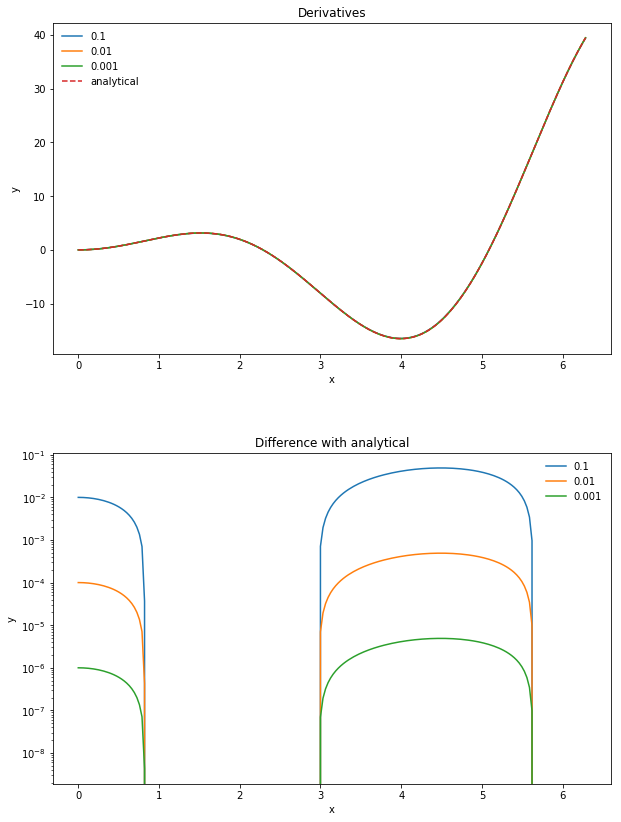

In [42]:
fig, axes = plt.subplots(2, 1,figsize=(10,14))
plt.subplots_adjust(hspace=0.3)
labels = ['0.1', '0.01','0.001']
ax = axes[0]
for i in range(3):
    ax.plot(x, num_deriv[i], label=labels[i])

ax.plot(x, derivative_exercise1(x), label='analytical',ls='dashed')    
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(frameon=False)
ax.set_title('Derivatives')

ax = axes[1]
for i in range(3):
    ax.plot(x, num_deriv[i]-derivative_exercise1(x), label=labels[i])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(frameon=False)
ax.set_title('Difference with analytical')
ax.set_yscale('log')


plt.show()

In [117]:
def riddlers_method(func, x, d, m, target_error):
    # for saving the error, one value per column # (Mean error)
    error = []
    # for saving D_i,j's
    all_D = np.zeros((m,m,len(x)))
    
    # First approximation
    h = 0.1
    all_D[0,0,:] = central_difference(func, x, h)
    
    # Then calculate the first column (D{i,0})
    for i in range(m):
        h /= d
        all_D[i,0,:] = central_difference(func, x, h)
    
    # Then calculate all others by combining
    for j in range(1,m): # columns
        for i in range(j,m): # rows
            #print (i,j)
            #print (f'{4**j}*S{i},{j-1} - S{i-1},{j-1} / {4**j} - 1' )
            all_D[i,j,:] = (d**(2*(j+1)) * all_D[i,j-1] - all_D[i-1,j-1]) / (
                           d**(2*(j+1)) - 1)
        error.append(np.abs(np.mean(all_D[i,j,:]-all_D[i,j-1,:])))
        if error[-1] < target_error:
            print (f"Target error of {target_error} reached at D_{i,j}")
            # done, can stop
            return all_D[i,j,:], error
        if len(error) > 2:
            if error[-1] > error[-2]:
                print (f"Error increased at at D_{i,j}")
                # error increased, should stop
                return all_D[i,j,:], error

    return all_D[m-1,m-1,:], error
        
        

In [118]:
riddlers_deriv, error = riddlers_method(func_exercise1, x, d=2, m=8, target_error=1e-10)

Target error of 1e-10 reached at D_(7, 5)


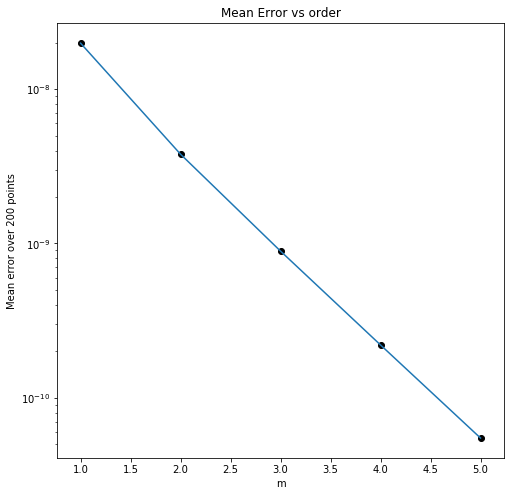

In [119]:
fig, axes = plt.subplots(1, 1,figsize=(8,8))
ax = axes
ax.plot(range(1,len(error)+1),error)
ax.scatter(range(1,len(error)+1),error,color='k')
ax.set_yscale('log')
ax.set_title('Mean Error vs order')
ax.set_xlabel('m')
ax.set_ylabel('Mean error over 200 points')
plt.show()

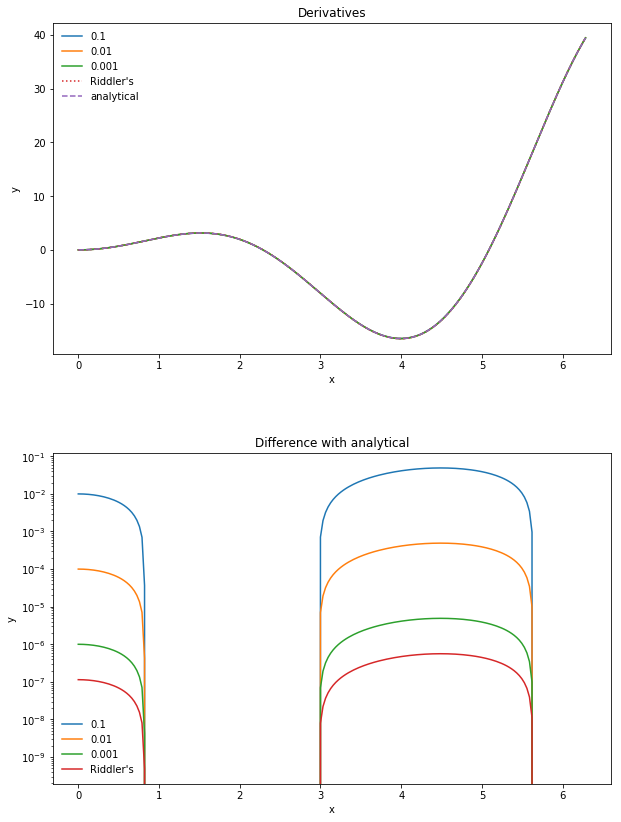

In [120]:
fig, axes = plt.subplots(2, 1,figsize=(10,14))
plt.subplots_adjust(hspace=0.3)
labels = ['0.1', '0.01','0.001']
ax = axes[0]
for i in range(3):
    ax.plot(x, num_deriv[i], label=labels[i])
ax.plot(x, riddlers_deriv, label="Riddler's",ls='dotted')

ax.plot(x, derivative_exercise1(x), label='analytical',ls='dashed')    
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(frameon=False)
ax.set_title('Derivatives')

ax = axes[1]
for i in range(3):
    ax.plot(x, num_deriv[i]-derivative_exercise1(x), label=labels[i])
ax.plot(x, riddlers_deriv-derivative_exercise1(x), label="Riddler's")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(frameon=False)
ax.set_title('Difference with analytical')
ax.set_yscale('log')


plt.show()

## Question 2: Linear congruential generator

In [121]:
def lincongen(a, X, c, m):
    return (a*X+c) % m
    

In [122]:
def pearson_corrcoef(x,y):
    return ( ( np.mean(x*y) - np.mean(x)*np.mean(y) ) / (np.std(x)*np.std(y)) )

In [162]:
def do_question2(seed,a,c,m):
    x = []

    # Generate first number
    X = lincongen(a,seed,c,m)
    x.append(X)
    # Generate 10,000 - 1 other numbers
    for i in range(10000-1):
        X = lincongen(a,X,c,m)
        x.append(X)

    x = np.array(x)

    print ('First 10 "random" variables')
    print (x[:10])
    plt.plot(x,np.roll(x,1),'o')
    plt.title('Comparison between n and n+1 element')
    plt.xlabel('value element n')
    plt.ylabel('value element n+1')

    corrcoef = pearson_corrcoef(x[:-1],x[1:])
    print ("Pearson correlation coefficient", corrcoef)
    # print ('According to numpy:')
    # print (np.corrcoef(x[:-1],x[1:]))

First 10 "random" variables
[13  7  8  4 20  2  5 16 18 10]
Pearson correlation coefficient 0.08718842000129048


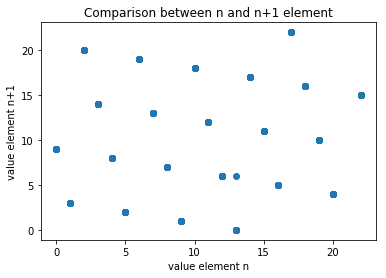

In [164]:
seed = 23
a, c, m = 19, 82, 23
do_question2(seed,a,c,m)

First 10 "random" variables
[       519       9943     188999    3591063   68230279 1296375383
 3156295879 4135046935 1256480519 2398293463]
Pearson correlation coefficient -1.895017439370657


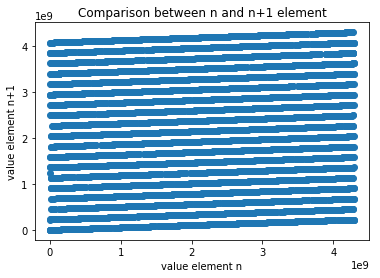

In [165]:
m = 2**32
do_question2(seed,a,c,m)

#### Disadvantage of using prime modulus is that every number has a unique precessor
#### Advantage is the period is usually longer. 

c) This is how to generate something with periodicity m

First 10 "random" variables
[1052188298 1566604385 2438785612 2230133051 3061458270 3518254373
 1106287680 3056099999  894324594 3878840361]
Pearson correlation coefficient -1.7333658818079007


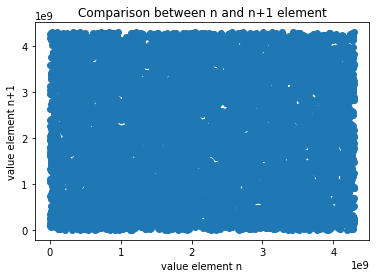

In [176]:
a, c, m = 1664525, 1013904223, 2**32
seed = 23
do_question2(seed,a,c,m)

First 10 "random" variables
[716845844 340644692 134815571   4897681 333757616 999128236 207517193
 943355634  88692408 281911305]
Pearson correlation coefficient -0.0017519672828230314


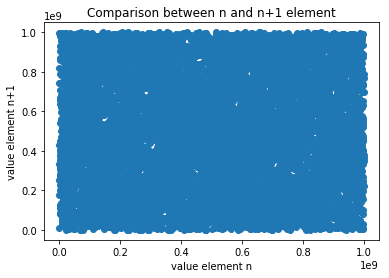

In [177]:
x = np.random.randint(1e9,size=10000)
print ('First 10 "random" variables')
print (x[:10])
plt.plot(x,np.roll(x,1),'o')
plt.title('Comparison between n and n+1 element')
plt.xlabel('value element n')
plt.ylabel('value element n+1')

corrcoef = pearson_corrcoef(x[:-1],x[1:])
print ("Pearson correlation coefficient", corrcoef)